## Будем классифицировать лягушек по кваканью.

## Предобработка

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [73]:
data = pd.read_csv("Frogs_MFCCs.csv")

In [74]:
data.shape

(7195, 26)

In [75]:
data.dtypes

MFCCs_ 1    float64
MFCCs_ 2    float64
MFCCs_ 3    float64
MFCCs_ 4    float64
MFCCs_ 5    float64
MFCCs_ 6    float64
MFCCs_ 7    float64
MFCCs_ 8    float64
MFCCs_ 9    float64
MFCCs_10    float64
MFCCs_11    float64
MFCCs_12    float64
MFCCs_13    float64
MFCCs_14    float64
MFCCs_15    float64
MFCCs_16    float64
MFCCs_17    float64
MFCCs_18    float64
MFCCs_19    float64
MFCCs_20    float64
MFCCs_21    float64
MFCCs_22    float64
Family       object
Genus        object
Species      object
RecordID      int64
dtype: object

In [76]:
data.isnull().sum()

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

 Видим, что нет пропусков в данных.

In [77]:
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


Удалим столбцы Family и Genus, так как Species полностью определяет 
значение Genus, а тот, в свою очередь, определяет значение Family.
Удалим также столбец RecordID, как неинформативный.

In [78]:
data.drop(['Family','Genus','RecordID'], axis = 1, inplace = True)

Среди количеств представителей классов есть значительный дисбалланс:

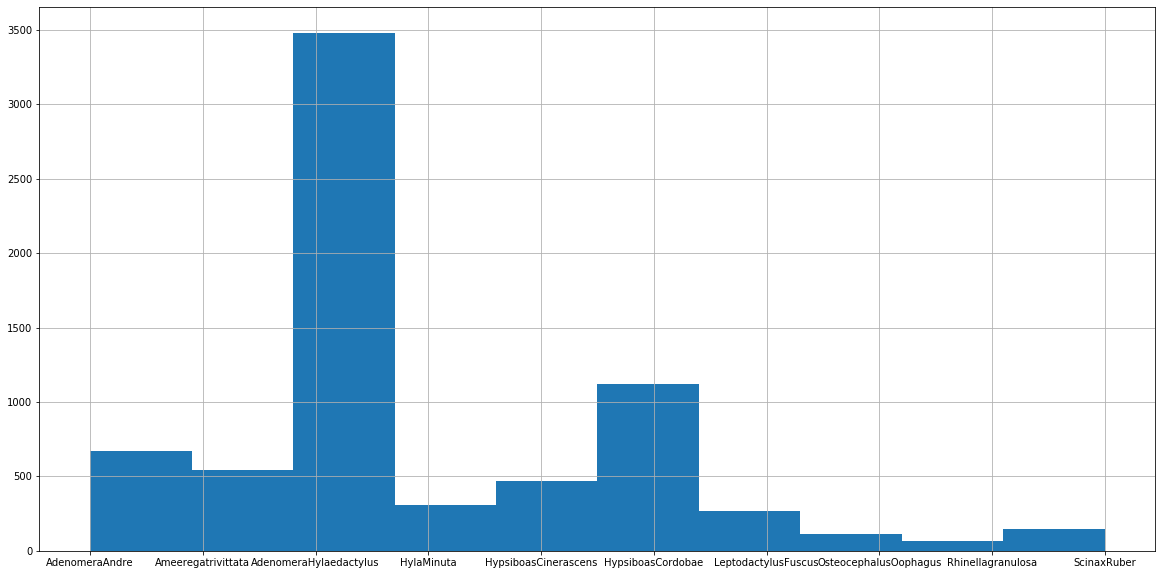

In [79]:
data['Species'].hist(figsize = (20,10))

In [80]:
data['Species'].value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

Создадим матрицу значений признаков:

In [81]:
X = data.select_dtypes('float64').values

Занумеруем классы:

In [82]:
y = LabelEncoder().fit_transform(data['Species'])

В описании датасета указано, что данные наблюдений уже пронормированы,
поэтому мы не будем их масштабировать. Действительно, имеем:

In [83]:
(X.min(), X.max())

(-0.9522656555578292, 1.0)

## ML

In [85]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, stratify = y )

Оптимальный набор макро-параметров будем искать среди следующего их множества (в SVC метод классификации 'один против всех' - по-умолчанию):

In [87]:
gridParams = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': ['balanced', None]
}
kf = KFold(shuffle=True, random_state=42)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [88]:
grid = GridSearchCV(SVC(), param_grid = gridParams, cv = kf, verbose=3)

In [89]:
grid.fit(XTrain,yTrain)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] C=0.001, class_weight=balanced, gamma=0.001, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.001, class_weight=balanced, gamma=0.001, kernel=linear, score=0.491, total=   5.0s
[CV] C=0.001, class_weight=balanced, gamma=0.001, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  C=0.001, class_weight=balanced, gamma=0.001, kernel=linear, score=0.149, total=   5.1s
[CV] C=0.001, class_weight=balanced, gamma=0.001, kernel=linear ......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s


[CV]  C=0.001, class_weight=balanced, gamma=0.001, kernel=linear, score=0.042, total=   5.3s
[CV] C=0.001, class_weight=balanced, gamma=0.001, kernel=rbf .........
[CV]  C=0.001, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.491, total=   8.0s
[CV] C=0.001, class_weight=balanced, gamma=0.001, kernel=rbf .........
[CV]  C=0.001, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.149, total=   8.0s
[CV] C=0.001, class_weight=balanced, gamma=0.001, kernel=rbf .........
[CV]  C=0.001, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.042, total=   8.6s
[CV] C=0.001, class_weight=balanced, gamma=0.001, kernel=poly ........
[CV]  C=0.001, class_weight=balanced, gamma=0.001, kernel=poly, score=0.491, total=   5.2s
[CV] C=0.001, class_weight=balanced, gamma=0.001, kernel=poly ........
[CV]  C=0.001, class_weight=balanced, gamma=0.001, kernel=poly, score=0.149, total=   5.4s
[CV] C=0.001, class_weight=balanced, gamma=0.001, kernel=poly ........
[CV]  C=0.001, class_weight=b

[CV]  C=0.001, class_weight=None, gamma=0.01, kernel=linear, score=0.491, total=   1.5s
[CV] C=0.001, class_weight=None, gamma=0.01, kernel=linear ...........
[CV]  C=0.001, class_weight=None, gamma=0.01, kernel=linear, score=0.490, total=   1.5s
[CV] C=0.001, class_weight=None, gamma=0.01, kernel=linear ...........
[CV]  C=0.001, class_weight=None, gamma=0.01, kernel=linear, score=0.470, total=   1.5s
[CV] C=0.001, class_weight=None, gamma=0.01, kernel=rbf ..............
[CV]  C=0.001, class_weight=None, gamma=0.01, kernel=rbf, score=0.491, total=   2.7s
[CV] C=0.001, class_weight=None, gamma=0.01, kernel=rbf ..............
[CV]  C=0.001, class_weight=None, gamma=0.01, kernel=rbf, score=0.490, total=   2.8s
[CV] C=0.001, class_weight=None, gamma=0.01, kernel=rbf ..............
[CV]  C=0.001, class_weight=None, gamma=0.01, kernel=rbf, score=0.470, total=   2.7s
[CV] C=0.001, class_weight=None, gamma=0.01, kernel=poly .............
[CV]  C=0.001, class_weight=None, gamma=0.01, kernel=po

[CV]  C=0.01, class_weight=balanced, gamma=0.01, kernel=poly, score=0.066, total=   5.2s
[CV] C=0.01, class_weight=balanced, gamma=0.1, kernel=linear .........
[CV]  C=0.01, class_weight=balanced, gamma=0.1, kernel=linear, score=0.764, total=   3.5s
[CV] C=0.01, class_weight=balanced, gamma=0.1, kernel=linear .........
[CV]  C=0.01, class_weight=balanced, gamma=0.1, kernel=linear, score=0.844, total=   3.6s
[CV] C=0.01, class_weight=balanced, gamma=0.1, kernel=linear .........
[CV]  C=0.01, class_weight=balanced, gamma=0.1, kernel=linear, score=0.853, total=   3.6s
[CV] C=0.01, class_weight=balanced, gamma=0.1, kernel=rbf ............
[CV]  C=0.01, class_weight=balanced, gamma=0.1, kernel=rbf, score=0.079, total=   8.2s
[CV] C=0.01, class_weight=balanced, gamma=0.1, kernel=rbf ............
[CV]  C=0.01, class_weight=balanced, gamma=0.1, kernel=rbf, score=0.018, total=   8.2s
[CV] C=0.01, class_weight=balanced, gamma=0.1, kernel=rbf ............
[CV]  C=0.01, class_weight=balanced, gamm

[CV]  C=0.01, class_weight=None, gamma=0.1, kernel=poly, score=0.490, total=   1.6s
[CV] C=0.01, class_weight=None, gamma=0.1, kernel=poly ...............
[CV]  C=0.01, class_weight=None, gamma=0.1, kernel=poly, score=0.470, total=   1.7s
[CV] C=0.01, class_weight=None, gamma=1, kernel=linear ...............
[CV]  C=0.01, class_weight=None, gamma=1, kernel=linear, score=0.753, total=   1.5s
[CV] C=0.01, class_weight=None, gamma=1, kernel=linear ...............
[CV]  C=0.01, class_weight=None, gamma=1, kernel=linear, score=0.764, total=   1.5s
[CV] C=0.01, class_weight=None, gamma=1, kernel=linear ...............
[CV]  C=0.01, class_weight=None, gamma=1, kernel=linear, score=0.747, total=   1.4s
[CV] C=0.01, class_weight=None, gamma=1, kernel=rbf ..................
[CV]  C=0.01, class_weight=None, gamma=1, kernel=rbf, score=0.803, total=   3.0s
[CV] C=0.01, class_weight=None, gamma=1, kernel=rbf ..................
[CV]  C=0.01, class_weight=None, gamma=1, kernel=rbf, score=0.811, total=

[CV]  C=0.1, class_weight=balanced, gamma=1, kernel=poly, score=0.977, total=   0.5s
[CV] C=0.1, class_weight=balanced, gamma=1, kernel=poly ..............
[CV]  C=0.1, class_weight=balanced, gamma=1, kernel=poly, score=0.974, total=   0.5s
[CV] C=0.1, class_weight=balanced, gamma=1, kernel=poly ..............
[CV]  C=0.1, class_weight=balanced, gamma=1, kernel=poly, score=0.982, total=   0.5s
[CV] C=0.1, class_weight=balanced, gamma=10, kernel=linear ...........
[CV]  C=0.1, class_weight=balanced, gamma=10, kernel=linear, score=0.950, total=   1.2s
[CV] C=0.1, class_weight=balanced, gamma=10, kernel=linear ...........
[CV]  C=0.1, class_weight=balanced, gamma=10, kernel=linear, score=0.939, total=   1.2s
[CV] C=0.1, class_weight=balanced, gamma=10, kernel=linear ...........
[CV]  C=0.1, class_weight=balanced, gamma=10, kernel=linear, score=0.949, total=   1.2s
[CV] C=0.1, class_weight=balanced, gamma=10, kernel=rbf ..............
[CV]  C=0.1, class_weight=balanced, gamma=10, kernel=rb

[CV]  C=0.1, class_weight=None, gamma=10, kernel=rbf, score=0.910, total=   1.8s
[CV] C=0.1, class_weight=None, gamma=10, kernel=poly .................
[CV]  C=0.1, class_weight=None, gamma=10, kernel=poly, score=0.982, total=   0.2s
[CV] C=0.1, class_weight=None, gamma=10, kernel=poly .................
[CV]  C=0.1, class_weight=None, gamma=10, kernel=poly, score=0.983, total=   0.2s
[CV] C=0.1, class_weight=None, gamma=10, kernel=poly .................
[CV]  C=0.1, class_weight=None, gamma=10, kernel=poly, score=0.987, total=   0.2s
[CV] C=1, class_weight=balanced, gamma=0.001, kernel=linear ..........
[CV]  C=1, class_weight=balanced, gamma=0.001, kernel=linear, score=0.971, total=   0.5s
[CV] C=1, class_weight=balanced, gamma=0.001, kernel=linear ..........
[CV]  C=1, class_weight=balanced, gamma=0.001, kernel=linear, score=0.968, total=   0.5s
[CV] C=1, class_weight=balanced, gamma=0.001, kernel=linear ..........
[CV]  C=1, class_weight=balanced, gamma=0.001, kernel=linear, score=0

[CV]  C=1, class_weight=None, gamma=0.001, kernel=rbf, score=0.490, total=   2.6s
[CV] C=1, class_weight=None, gamma=0.001, kernel=rbf .................
[CV]  C=1, class_weight=None, gamma=0.001, kernel=rbf, score=0.470, total=   2.6s
[CV] C=1, class_weight=None, gamma=0.001, kernel=poly ................
[CV]  C=1, class_weight=None, gamma=0.001, kernel=poly, score=0.491, total=   1.6s
[CV] C=1, class_weight=None, gamma=0.001, kernel=poly ................
[CV]  C=1, class_weight=None, gamma=0.001, kernel=poly, score=0.490, total=   1.6s
[CV] C=1, class_weight=None, gamma=0.001, kernel=poly ................
[CV]  C=1, class_weight=None, gamma=0.001, kernel=poly, score=0.470, total=   1.6s
[CV] C=1, class_weight=None, gamma=0.01, kernel=linear ...............
[CV]  C=1, class_weight=None, gamma=0.01, kernel=linear, score=0.964, total=   0.4s
[CV] C=1, class_weight=None, gamma=0.01, kernel=linear ...............
[CV]  C=1, class_weight=None, gamma=0.01, kernel=linear, score=0.964, total= 

[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.948, total=   1.6s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=rbf .............
[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.958, total=   1.6s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=poly ............
[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=poly, score=0.079, total=   5.4s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=poly ............
[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=poly, score=0.018, total=   5.3s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=poly ............
[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=poly, score=0.066, total=   5.2s
[CV] C=10, class_weight=balanced, gamma=0.1, kernel=linear ...........
[CV]  C=10, class_weight=balanced, gamma=0.1, kernel=linear, score=0.979, total=   0.3s
[CV] C=10, class_weight=balanced, gamma=0.1, kernel=linear ...........
[CV]  C=10, class_weight=balanced, gamma=0.1, kernel=

[CV]  C=10, class_weight=None, gamma=0.1, kernel=rbf, score=0.970, total=   0.5s
[CV] C=10, class_weight=None, gamma=0.1, kernel=rbf ..................
[CV]  C=10, class_weight=None, gamma=0.1, kernel=rbf, score=0.971, total=   0.5s
[CV] C=10, class_weight=None, gamma=0.1, kernel=rbf ..................
[CV]  C=10, class_weight=None, gamma=0.1, kernel=rbf, score=0.971, total=   0.5s
[CV] C=10, class_weight=None, gamma=0.1, kernel=poly .................
[CV]  C=10, class_weight=None, gamma=0.1, kernel=poly, score=0.906, total=   0.8s
[CV] C=10, class_weight=None, gamma=0.1, kernel=poly .................
[CV]  C=10, class_weight=None, gamma=0.1, kernel=poly, score=0.877, total=   0.8s
[CV] C=10, class_weight=None, gamma=0.1, kernel=poly .................
[CV]  C=10, class_weight=None, gamma=0.1, kernel=poly, score=0.897, total=   0.8s
[CV] C=10, class_weight=None, gamma=1, kernel=linear .................
[CV]  C=10, class_weight=None, gamma=1, kernel=linear, score=0.974, total=   0.2s
[CV

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 18.5min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [91]:
grid.best_params_

{'C': 10, 'class_weight': None, 'gamma': 1, 'kernel': 'rbf'}

Видим, что наилучшее качество дает вариант метода опорных векторов 
с гауссовским ядром с шириной $\gamma = 1$, с относительно малой
регуляризацией ($C=10$) и без балансировки классов.

In [92]:
best = grid.best_estimator_
best

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Посмотрим на метрики качества обучения:

In [93]:
yPred = best.predict(XTest)
print(classification_report(yTest, yPred))
print('\n')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       202
           1       1.00      1.00      1.00      1044
           2       1.00      1.00      1.00       163
           3       1.00      0.99      0.99        93
           4       0.99      0.98      0.98       142
           5       1.00      0.99      0.99       336
           6       0.98      0.98      0.98        81
           7       0.84      0.94      0.89        34
           8       1.00      0.90      0.95        20
           9       0.98      1.00      0.99        44

    accuracy                           0.99      2159
   macro avg       0.98      0.98      0.98      2159
weighted avg       0.99      0.99      0.99      2159





Посмотрим на матрицу ошибок:

In [94]:
cm = confusion_matrix(yTest, yPred)


In [95]:
Species = data['Species'].value_counts().index.tolist()
df_cm = pd.DataFrame(cm, Species, Species)

In [96]:
df_cm

,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraAndre,Ameeregatrivittata,HypsiboasCinerascens,HylaMinuta,LeptodactylusFuscus,ScinaxRuber,OsteocephalusOophagus,Rhinellagranulosa
AdenomeraHylaedactylus,201,0,0,0,0,0,0,1,0,0
HypsiboasCordobae,0,1043,0,0,0,0,0,0,0,1
AdenomeraAndre,0,0,163,0,0,0,0,0,0,0
Ameeregatrivittata,1,0,0,92,0,0,0,0,0,0
HypsiboasCinerascens,1,0,0,0,139,0,0,2,0,0
HylaMinuta,0,1,0,0,0,333,0,2,0,0
LeptodactylusFuscus,0,0,0,0,0,1,79,1,0,0
ScinaxRuber,0,0,0,0,2,0,0,32,0,0
OsteocephalusOophagus,0,0,0,0,0,0,2,0,18,0
Rhinellagranulosa,0,0,0,0,0,0,0,0,0,44


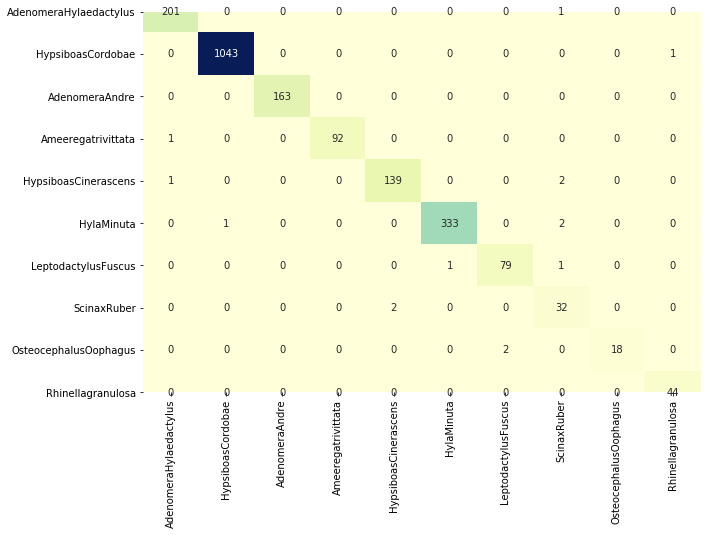

In [97]:
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", cbar=False, fmt='d')

Итак, используя метод опорных векторов, мы получили 
очень хорошую классификацию лягушек по их кваканью.